# # Using 5.2 - with the other set of params

# Ackley

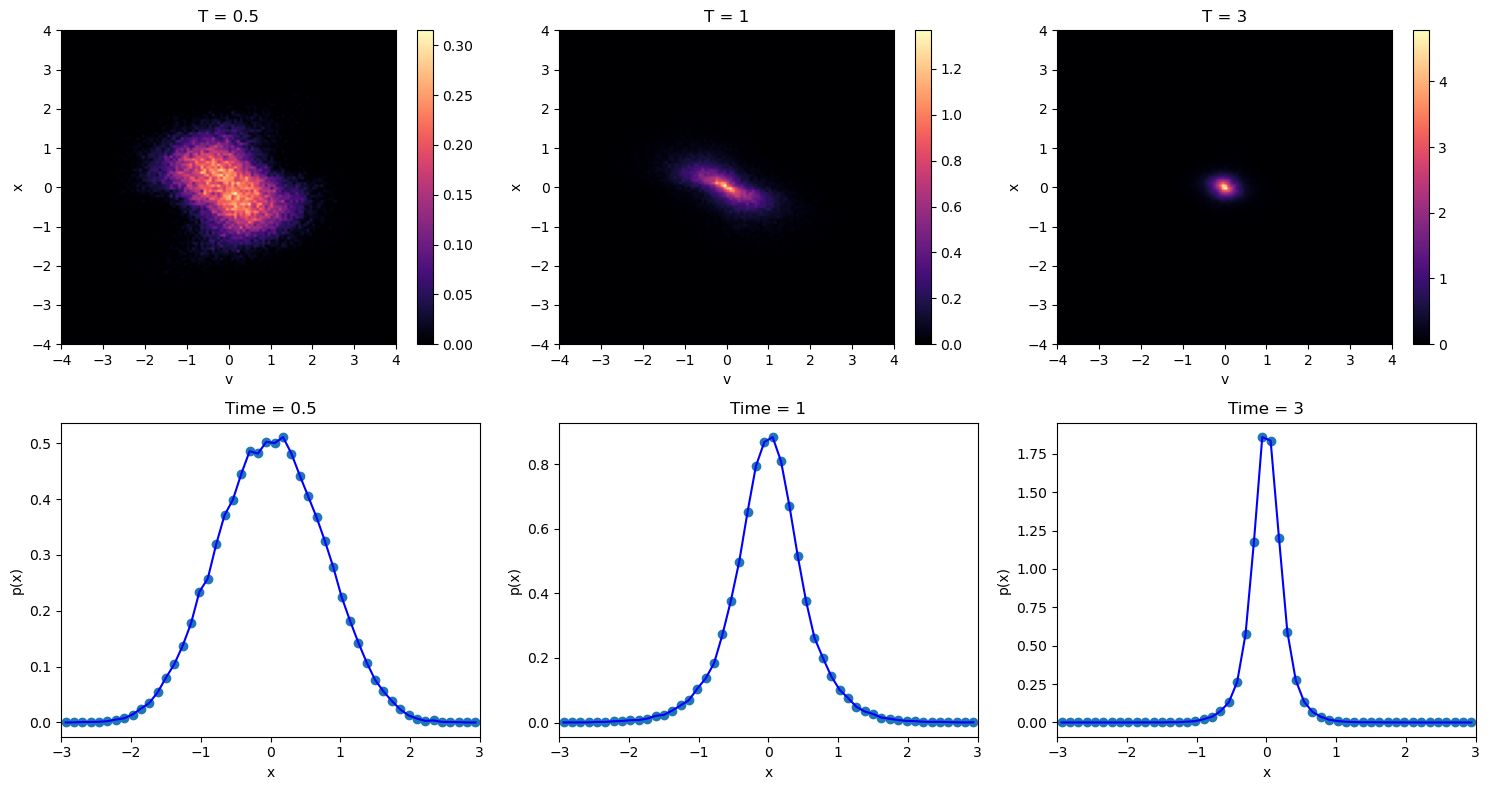

In [1]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np


d = 1

# Ackley function
def F(X):
   
    trm1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(X**2, axis=0) / d))
    trm2 = -np.exp(np.sum(np.cos(2 * np.pi * X), axis=0) / d)
    return trm1 + trm2 + 20 + np.e

def F1(X):
    return 10 * X.shape[0] + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)


# Parameters
Vmax = 4
Xmax = 3
Xmin = -3
Number_particles = 50000

T = 6
dt = 0.1
alpha = 30
sigma1 = 1/np.sqrt(3)
sigma2 = 1/np.sqrt(3)
lambd1 = 1
lambd2 = 1
gamma = 0.5
m = 1 - gamma
v = 0.5
beta = 30

# Initialize 

X = np.random.uniform(Xmin, Xmax, (d, Number_particles)) * 0.5 
V = np.random.uniform(-Vmax, Vmax, (d, Number_particles)) *0.5


Y = X.copy()

time_points = [0.5, 1, 3]
positions_at_time_points = []
histograms = []

# functions
def mean_field(alpha, F, X):
    wa = np.exp(-alpha * F(X))
    Nalpha = np.sum(wa)
    return np.sum(X * wa, axis=1) / Nalpha if Nalpha != 0 else np.zeros_like(X[:, 0])

def S(X, Y):
    return 1 + np.sign(F(Y) - F(X))


def Y_mean_field(F, Y):
    Y_obj = F(Y)
    min_idx = np.argmin(Y_obj)
    return Y[:, min_idx]


# optimization 
for current_it in np.arange(0, T, dt):

    drift1 = (lambd1 * dt) / (m + gamma * dt) * (Y - X)
    Y_mf = Y_mean_field(F, Y)
    
    drift2 = (lambd2 * dt) / (m + gamma * dt) * (Y_mf - X)
    drift = drift1 + drift2
    diff1 = ((sigma1 * np.sqrt(dt)) / (m + gamma * dt)) *(Y - X) * np.random.randn(1, Number_particles)
    diff2 = ((sigma2 * np.sqrt(dt)) / (m + gamma * dt)) * (Y_mf - X) * np.random.randn(1, Number_particles)
    diff = diff1 + diff2

    V = (m / (m + gamma * dt)) * V + drift + diff

    X = X +  dt* V

    Y = Y + v * dt * (X - Y) * S(X, Y)

    
    if current_it in time_points:

        hist, xedges, yedges = np.histogram2d(V[0], X[0], bins=[120, 120 ], range=[[-4, 4], [-4, 4]], density=True)
        histograms.append((hist, xedges, yedges))
        positions_at_time_points.append(X.copy())


# histograms and PDFs
fig, axs = plt.subplots(2, len(time_points), figsize=(15, 8))

# Plot histograms 
for i in range(len(time_points)):
    hist, xedges, yedges = histograms[i]
    im = axs[0, i].imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                          origin='lower', cmap='magma', aspect='auto')
    axs[0, i].set_title(f'T = {time_points[i]}')
    axs[0, i].set_xlabel('v')
    axs[0, i].set_ylabel('x')
    fig.colorbar(im, ax=axs[0, i])

# Plot PDFs 
for i in range(len(time_points)):
    positions = positions_at_time_points[i]
    density, bins = np.histogram(positions[0], bins=50, range=(Xmin, Xmax), density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    axs[1, i].scatter(bin_centers, density)
    axs[1, i].plot(bin_centers, density, color='b')
    axs[1, i].set_title(f'Time = {time_points[i]}')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('p(x)')
    axs[1, i].set_xlim([Xmin, Xmax])

plt.tight_layout()
plt.show()



# Rastrigin

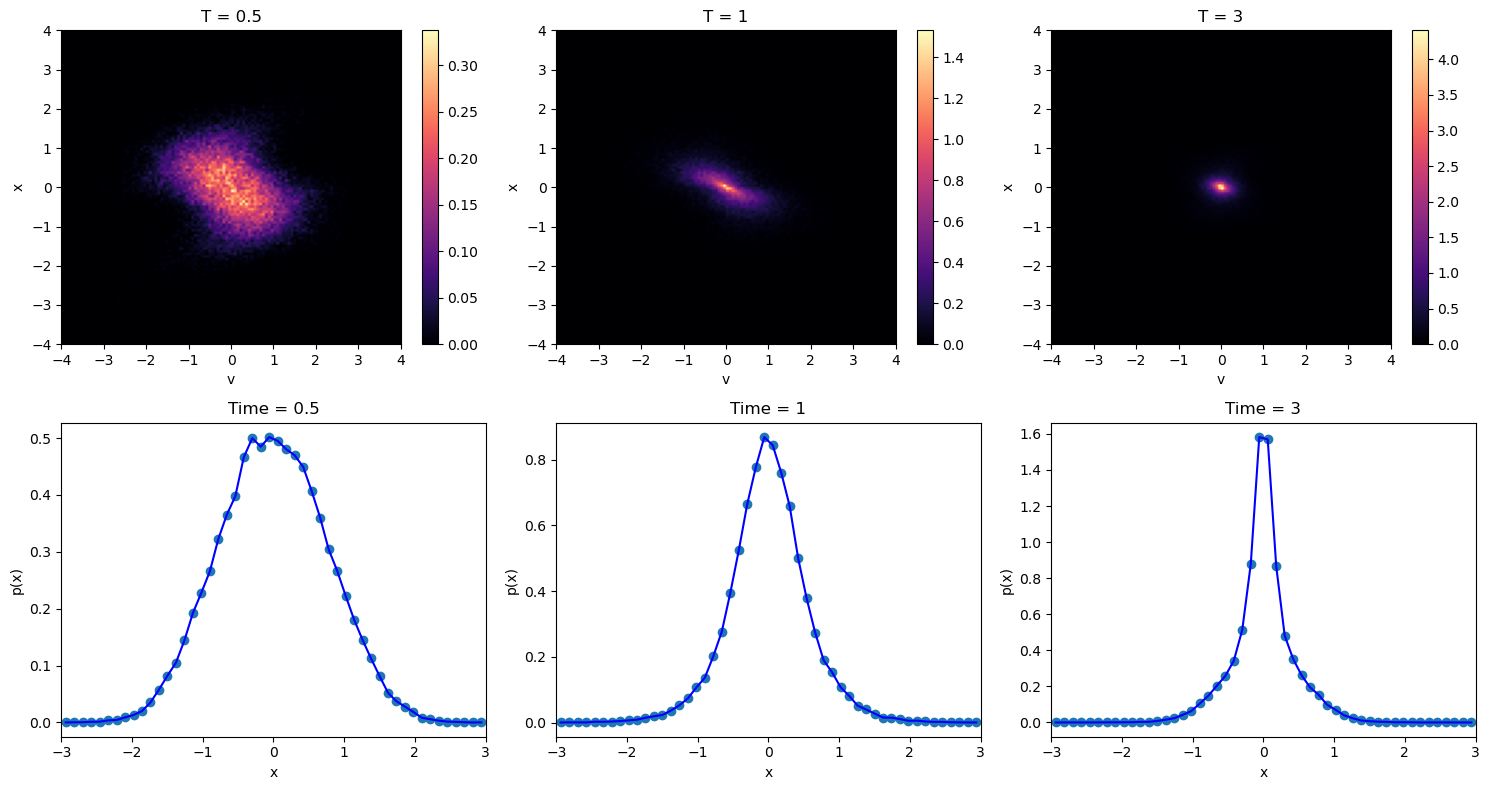

In [2]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np


d = 1

# Ackley function
def F1(X):
   
    trm1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(X**2, axis=0) / d))
    trm2 = -np.exp(np.sum(np.cos(2 * np.pi * X), axis=0) / d)
    return trm1 + trm2 + 20 + np.e

def F(X):
    return 10 * X.shape[0] + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)


# Parameters
Vmax = 4
Xmax = 3
Xmin = -3
Number_particles = 50000

T = 6
dt = 0.1
alpha = 30
sigma1 = 1/np.sqrt(3)
sigma2 = 1/np.sqrt(3)
lambd1 = 1
lambd2 = 1
gamma = 0.5
m = 1 - gamma
v = 0.5
beta = 30

# Initialize 

X = np.random.uniform(Xmin, Xmax, (d, Number_particles)) * 0.5 
V = np.random.uniform(-Vmax, Vmax, (d, Number_particles)) *0.5


Y = X.copy()

time_points = [0.5, 1, 3]
positions_at_time_points = []
histograms = []

# functions
def mean_field(alpha, F, X):
    wa = np.exp(-alpha * F(X))
    Nalpha = np.sum(wa)
    return np.sum(X * wa, axis=1) / Nalpha if Nalpha != 0 else np.zeros_like(X[:, 0])

def S(X, Y):
    return 1 + np.sign(F(Y) - F(X))


def Y_mean_field(F, Y):
    Y_obj = F(Y)
    min_idx = np.argmin(Y_obj)
    return Y[:, min_idx]


# optimization 
for current_it in np.arange(0, T, dt):

    drift1 = (lambd1 * dt) / (m + gamma * dt) * (Y - X)
    Y_mf = Y_mean_field(F, Y)
    
    drift2 = (lambd2 * dt) / (m + gamma * dt) * (Y_mf - X)
    drift = drift1 + drift2
    diff1 = ((sigma1 * np.sqrt(dt)) / (m + gamma * dt)) *(Y - X) * np.random.randn(1, Number_particles)
    diff2 = ((sigma2 * np.sqrt(dt)) / (m + gamma * dt)) * (Y_mf - X) * np.random.randn(1, Number_particles)
    diff = diff1 + diff2

    V = (m / (m + gamma * dt)) * V + drift + diff

    X = X +  dt* V

    Y = Y + v * dt * (X - Y) * S(X, Y)

    
    if current_it in time_points:

        hist, xedges, yedges = np.histogram2d(V[0], X[0], bins=[120, 120 ], range=[[-4, 4], [-4, 4]], density=True)
        histograms.append((hist, xedges, yedges))
        positions_at_time_points.append(X.copy())


# histograms and PDFs
fig, axs = plt.subplots(2, len(time_points), figsize=(15, 8))

# Plot histograms 
for i in range(len(time_points)):
    hist, xedges, yedges = histograms[i]
    im = axs[0, i].imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                          origin='lower', cmap='magma', aspect='auto')
    axs[0, i].set_title(f'T = {time_points[i]}')
    axs[0, i].set_xlabel('v')
    axs[0, i].set_ylabel('x')
    fig.colorbar(im, ax=axs[0, i])

# Plot PDFs 
for i in range(len(time_points)):
    positions = positions_at_time_points[i]
    density, bins = np.histogram(positions[0], bins=50, range=(Xmin, Xmax), density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    axs[1, i].scatter(bin_centers, density)
    axs[1, i].plot(bin_centers, density, color='b')
    axs[1, i].set_title(f'Time = {time_points[i]}')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('p(x)')
    axs[1, i].set_xlim([Xmin, Xmax])

plt.tight_layout()
plt.show()

